In [6]:
%cd ../..
%load_ext autoreload
%autoreload 2

/gpfs/space/home/dmytrosh/counterfactual-search


In [3]:
!nvidia-smi

Sun Oct 15 14:00:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.106.00   Driver Version: 460.106.00   CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-PCIE-40GB      Off  | 00000000:61:00.0 Off |                    0 |
| N/A   69C    P0   235W / 250W |  35784MiB / 40536MiB |     98%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
import os
import random
import shutil

import numpy as np
import torch
import yaml
from easydict import EasyDict as edict

from src.models import build_model
from src.trainers import build_trainer


def seed_everything(seed: int):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

config_path = 'configs/counterfactual/tsm_synthetic.yaml'

with open(config_path) as fid:
    opt = yaml.safe_load(fid)
    opt = edict(opt)
seed_everything(opt.seed)

model = build_model(opt.task_name, opt=opt.model, img_size=opt.dataset.img_size)
trainer = build_trainer(opt.task_name, opt, model, None)

/gpfs/space/home/dmytrosh/counterfactual-search/venv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/gpfs/space/home/dmytrosh/counterfactual-search/venv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Restored the classifier from: training_logs/classification/resnet18-October-14-2023_01+03PM-af13228-tsm_synth_r18/checkpoints/checkpoint_55.pth


[2023-10-15 15:27:09|INFO] - ================ Session (Sun Oct 15 15:27:09 2023) ================
[2023-10-15 15:27:09|INFO] - Logging directory: training_logs/counterfactual/counterfactual_lungs_cgan-October-15-2023_03+27PM-af13228-tsm_synth_r18_e2e
[2023-10-15 15:27:09|INFO] - Using model: CounterfactualCGAN


In [135]:
(train_loader, val_loader), cf_labels = trainer.get_dataloaders(ret_counterfactual_labels=True)

Instantiated training dataset for number of samples: 115394
Instantiated validation dataset for number of samples: 30683


Precomputing posterior probabilities:  86%|████████████████████████████████████▏     | 6205/7213 [03:19<00:13, 77.17it/s]

Unable to augment synthetic anomalies for scan s0377.nii.gz. Index - 191


Precomputing posterior probabilities: 100%|██████████████████████████████████████████| 7213/7213 [03:34<00:00, 33.59it/s]
[2023-10-15 13:18:14|INFO] - Precomputed condition labels for sampling. Num positive conditions: 23218


Instantiated training dataset for number of samples: 115394
Instantiated validation dataset for number of samples: 30683


In [139]:
cf_labels.sum()

23218

In [138]:
trainer.validation_epoch(val_loader)

Validation epoch: 0:   0%|                                                                      | 0/1918 [00:00<?, ?it/s]

tensor(0)


Validation epoch: 0:   0%|                                                              | 2/1918 [00:01<18:41,  1.71it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   0%|▏                                                             | 4/1918 [00:01<09:43,  3.28it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   0%|▏                                                             | 6/1918 [00:02<07:10,  4.44it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   0%|▎                                                             | 8/1918 [00:02<06:10,  5.16it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   1%|▎                                                            | 10/1918 [00:02<05:42,  5.57it/s]

tensor(1)
tensor(12)


Validation epoch: 0:   1%|▍                                                            | 12/1918 [00:03<05:29,  5.78it/s]

tensor(12)
tensor(11)


Validation epoch: 0:   1%|▍                                                            | 14/1918 [00:03<05:23,  5.89it/s]

tensor(13)
tensor(9)


Validation epoch: 0:   1%|▌                                                            | 16/1918 [00:03<05:19,  5.95it/s]

tensor(2)
tensor(0)


Validation epoch: 0:   1%|▌                                                            | 18/1918 [00:04<05:18,  5.96it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   1%|▋                                                            | 20/1918 [00:04<05:18,  5.96it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   1%|▋                                                            | 22/1918 [00:04<05:17,  5.97it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   1%|▊                                                            | 24/1918 [00:05<05:17,  5.97it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   1%|▊                                                            | 26/1918 [00:05<05:16,  5.97it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   1%|▉                                                            | 28/1918 [00:05<05:16,  5.97it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   2%|▉                                                            | 30/1918 [00:06<05:16,  5.96it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   2%|█                                                            | 32/1918 [00:06<06:46,  4.63it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   2%|█                                                            | 34/1918 [00:06<06:00,  5.22it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   2%|█▏                                                           | 36/1918 [00:07<05:37,  5.58it/s]

tensor(0)
tensor(7)


Validation epoch: 0:   2%|█▏                                                           | 38/1918 [00:07<05:26,  5.76it/s]

tensor(13)
tensor(10)


Validation epoch: 0:   2%|█▎                                                           | 40/1918 [00:07<05:19,  5.87it/s]

tensor(9)
tensor(6)


Validation epoch: 0:   2%|█▎                                                           | 42/1918 [00:08<05:16,  5.94it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   2%|█▍                                                           | 44/1918 [00:08<05:15,  5.94it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   2%|█▍                                                           | 46/1918 [00:08<05:13,  5.96it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   3%|█▌                                                           | 48/1918 [00:09<05:13,  5.97it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   3%|█▌                                                           | 50/1918 [00:09<05:14,  5.94it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   3%|█▋                                                           | 52/1918 [00:09<05:13,  5.95it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   3%|█▋                                                           | 54/1918 [00:10<05:12,  5.96it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   3%|█▊                                                           | 56/1918 [00:10<05:11,  5.97it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   3%|█▊                                                           | 58/1918 [00:10<05:11,  5.96it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   3%|█▉                                                           | 60/1918 [00:11<05:11,  5.97it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   3%|█▉                                                           | 62/1918 [00:11<06:39,  4.64it/s]

tensor(0)
tensor(5)


Validation epoch: 0:   3%|██                                                           | 64/1918 [00:12<05:54,  5.23it/s]

tensor(13)
tensor(12)


Validation epoch: 0:   3%|██                                                           | 66/1918 [00:12<05:31,  5.58it/s]

tensor(11)
tensor(14)


Validation epoch: 0:   4%|██▏                                                          | 68/1918 [00:12<05:20,  5.77it/s]

tensor(12)
tensor(7)


Validation epoch: 0:   4%|██▏                                                          | 70/1918 [00:13<05:14,  5.87it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   4%|██▎                                                          | 72/1918 [00:13<05:12,  5.91it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   4%|██▎                                                          | 74/1918 [00:13<05:10,  5.93it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   4%|██▍                                                          | 76/1918 [00:14<05:09,  5.95it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   4%|██▍                                                          | 78/1918 [00:14<05:09,  5.95it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   4%|██▌                                                          | 80/1918 [00:14<05:09,  5.94it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   4%|██▌                                                          | 82/1918 [00:15<05:08,  5.95it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   4%|██▋                                                          | 84/1918 [00:15<05:08,  5.94it/s]

tensor(0)
tensor(1)


Validation epoch: 0:   4%|██▋                                                          | 86/1918 [00:15<05:08,  5.93it/s]

tensor(13)
tensor(15)


Validation epoch: 0:   5%|██▊                                                          | 88/1918 [00:16<05:08,  5.93it/s]

tensor(12)
tensor(9)


Validation epoch: 0:   5%|██▊                                                          | 90/1918 [00:16<05:07,  5.94it/s]

tensor(11)
tensor(0)


Validation epoch: 0:   5%|██▉                                                          | 92/1918 [00:17<06:35,  4.62it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   5%|██▉                                                          | 94/1918 [00:17<05:49,  5.21it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   5%|███                                                          | 96/1918 [00:17<05:28,  5.54it/s]

tensor(0)
tensor(0)


Validation epoch: 0:   5%|███                                                          | 98/1918 [00:18<05:16,  5.75it/s]

tensor(0)
tensor(0)


tensor(0)


[2023-10-15 13:24:23|INFO] - [Average of positives/negatives ratio in batch: 0]
                                                                                                                         
KeyboardInterrupt



In [8]:
from src.datasets import get_dataloaders
from src.datasets.augmentations import get_transforms
from src.models.classifier import compute_sampler_condition_labels, predict_probs
self = trainer
transforms = get_transforms(self.opt.dataset)
# compute sampler labels to create batches with uniformly distributed labels
params = edict(self.opt.dataset, use_sampler=False, shuffle_test=False)
# GAN's train data is expected to be classifier's validation data
train_loader, _ = get_dataloaders(params, {'train': transforms['val'], 'val': transforms['train']})
# posterior_probs, _ = predict_probs(train_loader, self.model.classifier_f, task='binary' if self.model.n_classes == 1 else 'multiclass')
# sampler_labels = compute_sampler_condition_labels(posterior_probs, self.model.explain_class_idx, self.model.num_bins)

Instantiated training dataset for number of samples: 115394
Instantiated validation dataset for number of samples: 30683


In [19]:
batch = next(iter(train_loader))

In [20]:
batch['image'].shape

torch.Size([16, 1, 256, 256])

In [25]:
batch['label']

tensor([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [36]:
class_to_idx = train_loader.dataset.scans[0].class_to_idx
print(class_to_idx)
train_loader.dataset.scans[0].sampling_class

{'empty': 0, 'kidney': 1}


'kidney'

In [51]:
kidney_idxs = np.argwhere(train_loader.dataset.get_sampling_labels())

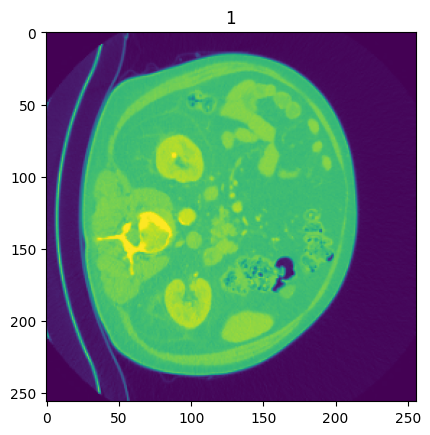

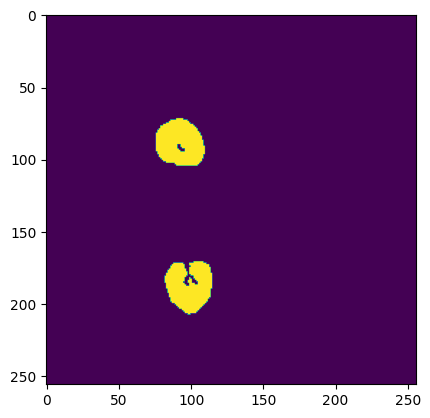

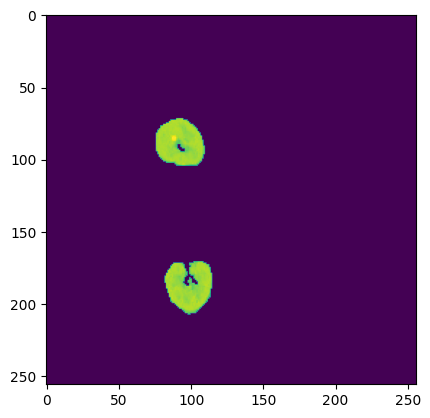

In [76]:
from matplotlib import pyplot as plt
idx = 3
plt.title(batch['label'][idx].item())
plt.imshow(batch['image'][idx][0])
plt.figure()
plt.imshow(batch['masks'][idx][0])
plt.figure()

batch['image'][idx][0] += 1
batch['image'][idx][0] /= 2
plt.imshow(batch['image'][idx][0] * batch['masks'][idx][0].bool(), vmin=batch['image'][idx][0].min())

In [75]:
batch['image'][idx][0]

tensor([[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
        ...,
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]])

In [74]:
(batch['image'][idx][0] & batch['masks'][idx][0].bool()).max()

RuntimeError: "bitwise_and_cpu" not implemented for 'Float'

In [17]:
transforms

{'train': Compose([
   Resize(always_apply=False, p=1, height=256, width=256, interpolation=1),
   Normalize(always_apply=False, p=1.0, mean=[0.5], std=[0.5], max_pixel_value=255),
 ], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={}),
 'val': Compose([
   Resize(always_apply=False, p=1, height=256, width=256, interpolation=1),
   Normalize(always_apply=False, p=1.0, mean=[0.5], std=[0.5], max_pixel_value=255),
 ], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})}

In [81]:
!pwd

/gpfs/space/home/dmytrosh/counterfactual-search


In [83]:
!ls training_logs/classification/resnet18-October-14-2023_01+03PM-af13228-tsm_synth_r18/checkpoints/checkpoint_55.pt

ls: cannot access training_logs/classification/resnet18-October-14-2023_01+03PM-af13228-tsm_synth_r18/checkpoints/checkpoint_55.pt: No such file or directory


In [98]:
from pathlib import Path
clf_config = 'configs/classification/resnet18_tsm_synthetic.yaml'
with open(clf_config) as fid:
    copt = yaml.safe_load(fid)
    copt = edict(copt)
seed_everything(copt.seed)

cmodel = build_model(copt.task_name, opt=copt.model, img_size=copt.dataset.img_size)
ctrainer = build_trainer(copt.task_name, copt, cmodel, continue_path=Path(opt.model.classifier_ckpt).parent.parent)

/gpfs/space/home/dmytrosh/counterfactual-search/venv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/gpfs/space/home/dmytrosh/counterfactual-search/venv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
[2023-10-15 12:13:54|INFO] - ================ Session (Sun Oct 15 12:13:54 2023) ================
[2023-10-15 12:13:54|INFO] - Logging directory: training_logs/classification/resnet18-October-14-2023_01+03PM-af13228-tsm_synth_r18
[2023-10-15 12:13:54|INFO] - Restored checkpoint training_logs/classification/resnet18-October-14-2023_01+03PM-af13228-tsm_synth_r18/checkpoints/checkpoint_55.pth (October 14, 202

In [99]:
cloaders = ctrainer.get_dataloaders()
ctrainer.validation_epoch(cloaders[1])

Instantiated training dataset for number of samples: 115394
Instantiated validation dataset for number of samples: 30683


[2023-10-15 12:14:13|INFO] - [Finished validation epoch 55/1000] [Epoch loss: 0.075510] [Epoch F1 score: 0.950345]       


{'loss': tensor(0.0755),
 'BinaryPrecision': tensor(0.9636, device='cuda:0'),
 'BinaryRecall': tensor(0.9374, device='cuda:0'),
 'BinaryF1Score': tensor(0.9503, device='cuda:0')}

In [100]:
cloaders = ctrainer.get_dataloaders()
ctrainer.validation_epoch(cloaders[1])

Exception ignored in: <function Logger.__del__ at 0x2b66aac3f550>
Traceback (most recent call last):
  File "/gpfs/space/home/dmytrosh/counterfactual-search/src/logger.py", line 35, in __del__
AttributeError: 'Logger' object has no attribute 'writer'


Instantiated training dataset for number of samples: 115394
Instantiated validation dataset for number of samples: 30683


[2023-10-15 12:14:47|INFO] - [Finished validation epoch 55/1000] [Epoch loss: 0.076116] [Epoch F1 score: 0.949947]       


{'loss': tensor(0.0761),
 'BinaryPrecision': tensor(0.9634, device='cuda:0'),
 'BinaryRecall': tensor(0.9369, device='cuda:0'),
 'BinaryF1Score': tensor(0.9499, device='cuda:0')}

In [90]:
torch.allclose(next(model.classifier_f.parameters()), next(cmodel.model.parameters()))

True

In [114]:
train_loader.dataset.scans[0].transforms

Compose([
  Resize(always_apply=False, p=1, height=256, width=256, interpolation=1),
  Normalize(always_apply=False, p=1.0, mean=[0.5], std=[0.5], max_pixel_value=255),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})

In [133]:
trainer.validation_epoch(val_loader)

[2023-10-15 13:13:42|INFO] - [Average of positives/negatives ratio in batch: 0]                                          


AttributeError: 'EasyDict' object has no attribute 'eval_counter_freq'

In [9]:
posterior_probs, _ = predict_probs(train_loader, self.model.classifier_f, task='binary' if self.model.n_classes == 1 else 'multiclass')
# sampler_labels = compute_sampler_condition_labels(posterior_probs, self.model.explain_class_idx, self.model.num_bins)

Precomputing posterior probabilities: 100%|██████████████████████████████████| 7213/7213 [02:13<00:00, 53.88it/s]


In [12]:
!pip install seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 1.8 MB/s eta 0:00:003.4 MB/s eta 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [22]:
(np.array(posterior_probs) > 0.5).sum()

19036

In [14]:
(np.array(posterior_probs) < 0.05).sum()

95103

In [20]:
(np.array(posterior_probs) > 0.7).sum()

18701

In [11]:
np.array(posterior_probs).std()

0.36431053

In [10]:
np.array(posterior_probs).reshape(-1).max()

1.0

In [105]:
plt.hist(posterior_probs)


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x2b66509a4790> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x2b66b5ea1ee0> (for post_execute):



KeyboardInterrupt

